<a href="https://colab.research.google.com/github/SinisterXI/CS-351L---AI-Lab-GitHub-Repository_2022428/blob/main/Shameer_CS351L_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Neural Network for Edge Weight Prediction
Epoch [10/100], Loss: 48.3486
Epoch [20/100], Loss: 5.5897
Epoch [30/100], Loss: 2.3377
Epoch [40/100], Loss: 1.8919
Epoch [50/100], Loss: 1.4813
Epoch [60/100], Loss: 1.2388
Epoch [70/100], Loss: 1.0462
Epoch [80/100], Loss: 0.9242
Epoch [90/100], Loss: 0.9017
Epoch [100/100], Loss: 0.9280
3D Network Topology


<Figure size 1400x1000 with 0 Axes>

2D Network Topology


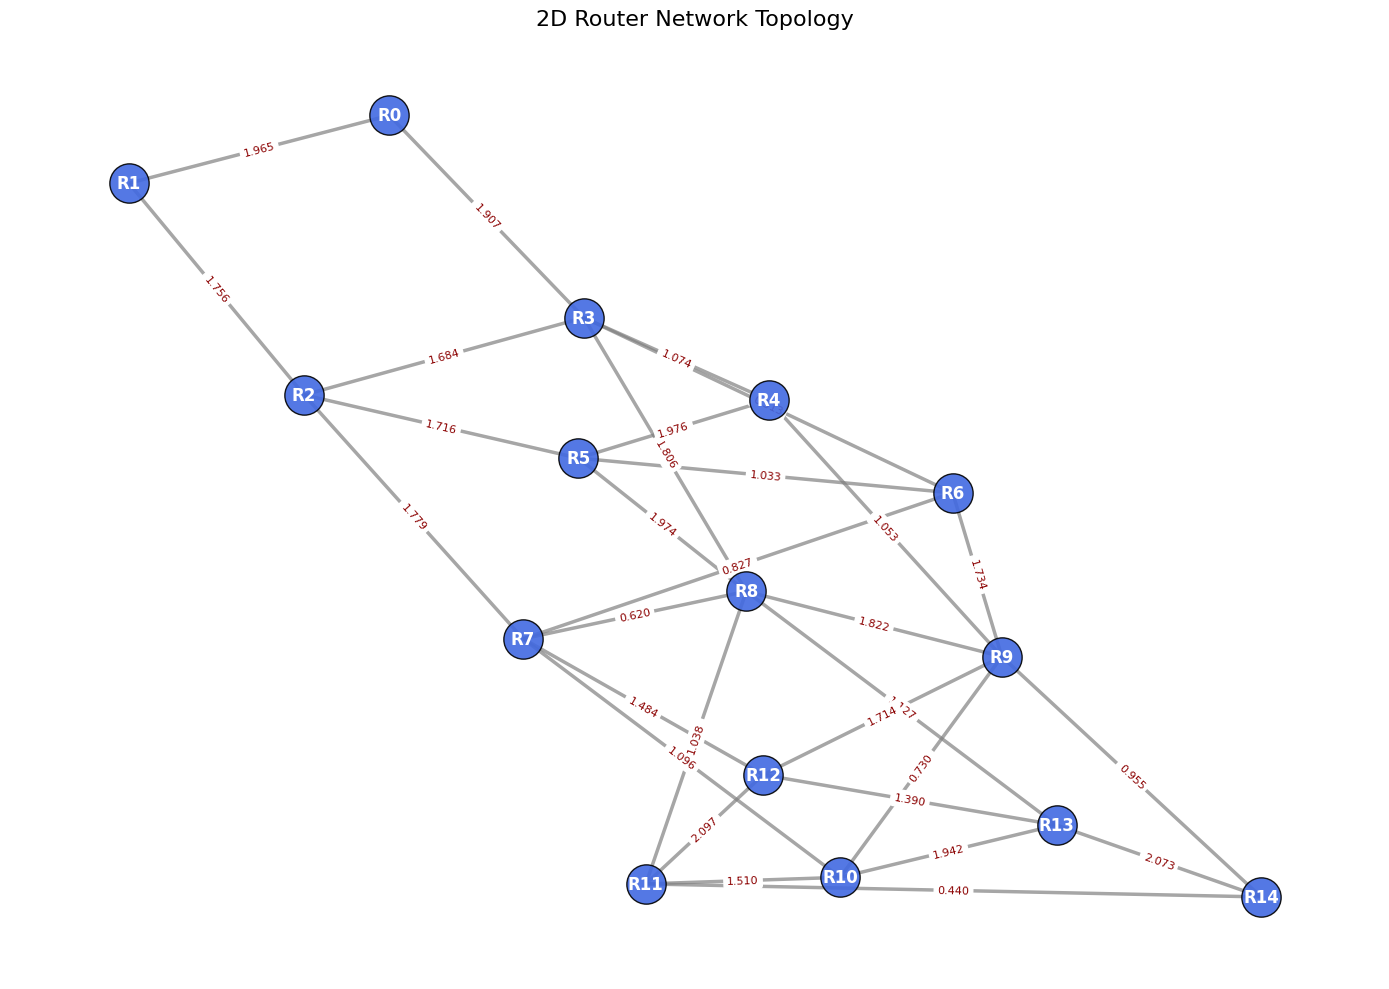


Routing Simulation 1:
Finding path from R3 to R11
Optimal Path: R3 -> R8 -> R11
Total Distance/Cost: 2.8436

Best Path Across All Simulations:
Best Path: R3 -> R8 -> R11
Best Cost: 2.8436


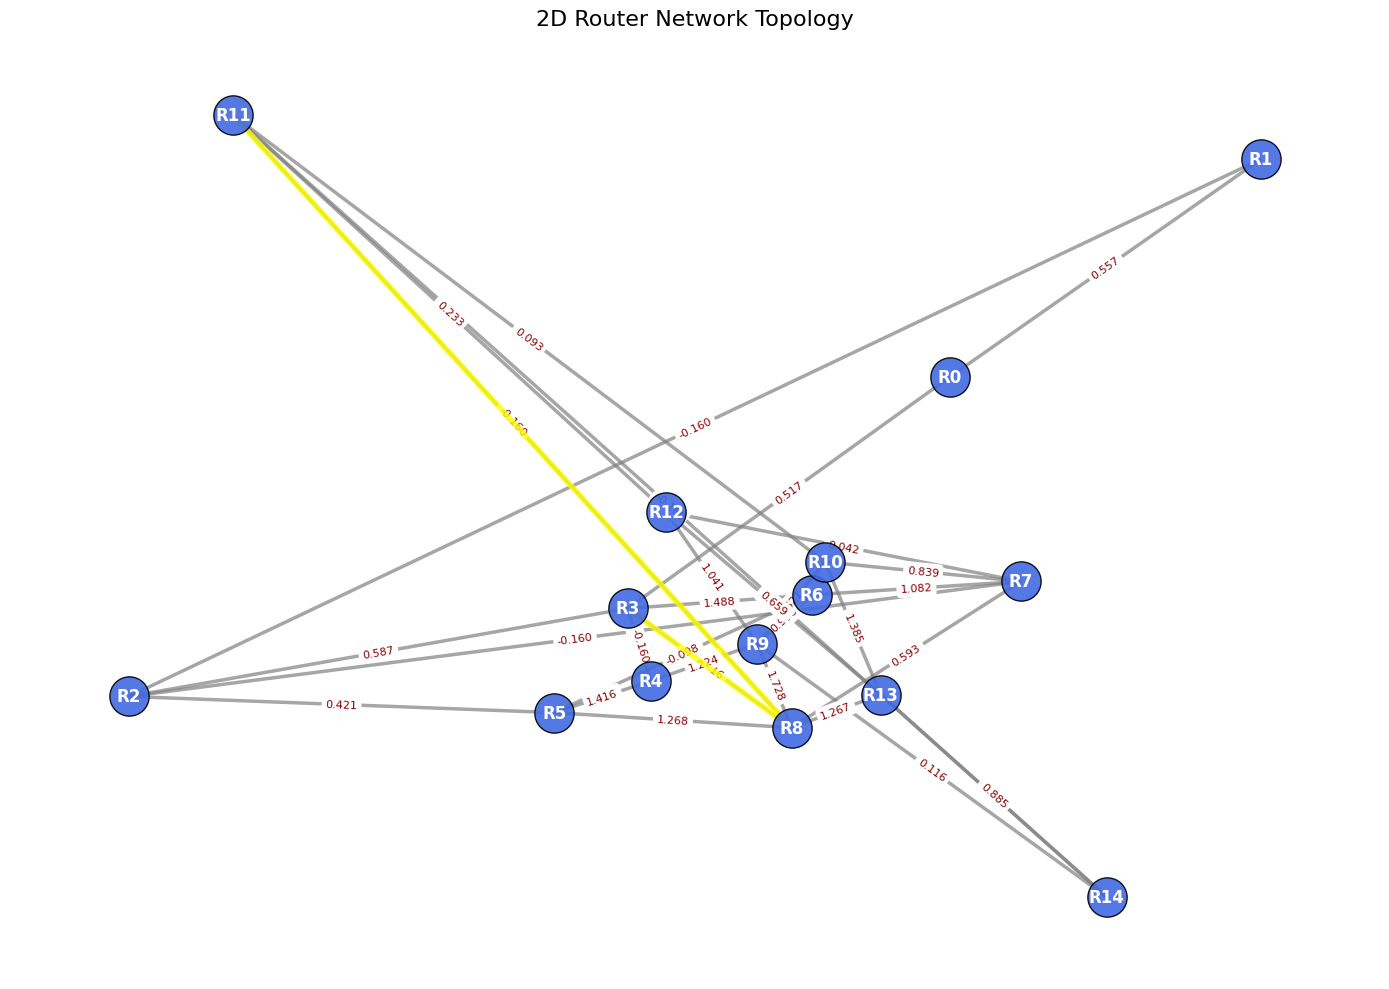

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import heapq
import random

class RouterNetworkNN:
    def __init__(self, num_routers=15):
        self.num_routers = num_routers
        self.graph = self.create_network_topology()
        self.model = self.create_neural_network()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.01)
        self.criterion = nn.MSELoss()

        # Train the model initially
        self.train_neural_network()

        # Variables to store the best path and its cost
        self.best_path = None
        self.best_cost = float('inf')

    def create_network_topology(self):
        graph = nx.Graph()
        routers = [f'R{i}' for i in range(self.num_routers)]
        graph.add_nodes_from(routers)

        # More complex connection strategy for 15 routers
        connections = []
        for i in range(self.num_routers):
            # Connect to nearest neighbors
            if i+1 < self.num_routers:
                connections.append((f'R{i}', f'R{i+1}'))
            # Add some random additional connections
            if i+3 < self.num_routers and random.random() < 0.7:
                connections.append((f'R{i}', f'R{i+3}'))
            if i+5 < self.num_routers and random.random() < 0.5:
                connections.append((f'R{i}', f'R{i+5}'))

        for connection in connections:
            weight = self.generate_initial_weight(connection)
            graph.add_edge(connection[0], connection[1], weight=weight)

        return graph

    def generate_initial_weight(self, connection):
        """
        Generate initial edge weights with more realistic features
        """
        distance = np.random.uniform(10, 100)  # Physical distance
        bandwidth = np.random.uniform(50, 1000)  # Bandwidth capacity
        latency = np.random.uniform(1, 50)  # Network latency
        reliability = np.random.uniform(0.7, 1.0)  # Connection reliability

        # Combine features to create initial weight
        initial_weight = (
            0.3 * distance +
            0.2 * (1000 - bandwidth) +
            0.3 * latency +
            0.2 * (1 - reliability)
        ) / 100

        return initial_weight

    def create_neural_network(self):
        """
        Enhanced neural network for predicting edge weights
        """
        class EdgeWeightPredictor(nn.Module):
            def __init__(self):
                super().__init__()
                self.network = nn.Sequential(
                    nn.Linear(4, 32),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(32, 16),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(16, 1)
                )

            def forward(self, x):
                # Ensure input is 2D (batch x features)
                if x.dim() == 1:
                    x = x.unsqueeze(0)
                return self.network(x)

        return EdgeWeightPredictor()

    def generate_training_data(self, num_samples=1000):
        """
        Generate synthetic training data for the neural network
        """
        features = []
        weights = []

        for _ in range(num_samples):
            # Generate features similar to initial weight generation
            distance = np.random.uniform(10, 100)
            bandwidth = np.random.uniform(50, 1000)
            latency = np.random.uniform(1, 50)
            reliability = np.random.uniform(0.7, 1.0)

            # Calculate target weight
            target_weight = (
                0.3 * distance +
                0.2 * (1000 - bandwidth) +
                0.3 * latency +
                0.2 * (1 - reliability)
            ) / 100

            features.append([distance, bandwidth, latency, reliability])
            weights.append([target_weight])

        return (torch.FloatTensor(features),
                torch.FloatTensor(weights))

    def train_neural_network(self, epochs=100):
        """
        Train the neural network on synthetic data
        """
        X_train, y_train = self.generate_training_data()

        print("Training Neural Network for Edge Weight Prediction")

        for epoch in range(epochs):
            # Forward pass
            outputs = self.model(X_train)
            loss = self.criterion(outputs, y_train)

            # Backward pass and optimize
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    def generate_edge_weight(self, connection):
        """
        Generate edge weight using trained neural network
        """
        # Create features for edge weight prediction
        distance = np.random.uniform(10, 100)
        bandwidth = np.random.uniform(50, 1000)
        latency = np.random.uniform(1, 50)
        reliability = np.random.uniform(0.7, 1.0)

        features = torch.tensor([distance, bandwidth, latency, reliability], dtype=torch.float32)

        # Predict weight using neural network
        with torch.no_grad():
            predicted_weight = self.model(features).item()

        return predicted_weight

    def visualize_network(self, mode='2d', best_path=None):
        """
        Enhanced 2D visualization of network topology with option to highlight best path
        """
        plt.figure(figsize=(14, 10))

        if mode == '2d':
            # 2D Visualization with improved appearance
            plt.subplot(111)

            # Use a force-directed layout for a more natural visualization
            pos = nx.spring_layout(self.graph, seed=42, k=0.15, iterations=50)

            # Draw nodes with larger sizes and customized colors
            nx.draw_networkx_nodes(self.graph, pos, node_color='royalblue',
                                   node_size=800, alpha=0.9, edgecolors='black')

            # Draw edges with thicker lines and more transparency for aesthetic appeal
            nx.draw_networkx_edges(self.graph, pos, width=2.5,
                                   edge_color='gray', alpha=0.7)

            # Draw node labels with larger font size for clarity
            nx.draw_networkx_labels(self.graph, pos, font_size=12, font_color='white', font_weight='bold')

            # Draw edge labels (weights) in a more readable format
            edge_labels = nx.get_edge_attributes(self.graph, 'weight')
            edge_labels = {k: f'{v:.3f}' for k, v in edge_labels.items()}
            nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels,
                                         font_size=8, font_color='darkred')

            # Highlight best path (if provided)
            if best_path:
                path_edges = list(zip(best_path, best_path[1:]))
                nx.draw_networkx_edges(self.graph, pos, edgelist=path_edges,
                                       width=4, edge_color='yellow', alpha=0.8)

            # Set title and remove axis for a cleaner look
            plt.title('2D Router Network Topology', fontsize=16)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    def run_routing_simulation(self, num_simulations=1):
        """
        Simulate routing between fixed source and destination routers
        """
        def neural_dijkstra(graph, start, end):
            """
            Dijkstra's algorithm with neural network-predicted edge weights
            """
            distances = {node: float('inf') for node in graph.nodes()}
            distances[start] = 0
            pq = [(0, start)]
            previous_nodes = {node: None for node in graph.nodes()}

            while pq:
                current_distance, current_node = heapq.heappop(pq)

                # If we have reached the end node, reconstruct and return path
                if current_node == end:
                    path = []
                    while current_node:
                        path.append(current_node)
                        current_node = previous_nodes[current_node]
                    return path[::-1], current_distance

                # If we've found a longer path, skip
                if current_distance > distances[current_node]:
                    continue

                # Check all neighbors
                for neighbor in graph.neighbors(current_node):
                    # Use neural network to predict edge weight dynamically
                    connection = (current_node, neighbor)
                    edge_weight = graph[current_node][neighbor]['weight']

                    distance = current_distance + edge_weight

                    # If we've found a shorter path, update
                    if distance < distances[neighbor]:
                        distances[neighbor] = distance
                        previous_nodes[neighbor] = current_node
                        heapq.heappush(pq, (distance, neighbor))

            return None, float('inf')

        # Run routing simulation with fixed source (router 3) and destination (router 11)
        for i in range(num_simulations):
            start = 'R3'  # Fixed starting router
            end = 'R11'   # Fixed destination router

            print(f"\nRouting Simulation {i+1}:")
            print(f"Finding path from {start} to {end}")

            # Find path using neural network-enhanced Dijkstra
            path, total_distance = neural_dijkstra(self.graph, start, end)

            if path:
                print(f"Optimal Path: {' -> '.join(path)}")
                print(f"Total Distance/Cost: {total_distance:.4f}")

                # Update best path if this one is better
                if total_distance < self.best_cost:
                    self.best_cost = total_distance
                    self.best_path = path
            else:
                print("No path found between routers.")

            # Optionally, update graph weights after each simulation
            for connection in self.graph.edges():
                new_weight = self.generate_edge_weight(connection)
                self.graph[connection[0]][connection[1]]['weight'] = new_weight

        # Visualize the best path after all simulations
        print("\nBest Path Across All Simulations:")
        if self.best_path:
            print(f"Best Path: {' -> '.join(self.best_path)}")
            print(f"Best Cost: {self.best_cost:.4f}")
            self.visualize_network(mode='2d', best_path=self.best_path)
def main():
    # Create router network
    router_network = RouterNetworkNN(num_routers=15)

    # Visualize in 3D
    print("3D Network Topology")
    router_network.visualize_network(mode='3d')

    # Visualize in 2D
    print("2D Network Topology")
    router_network.visualize_network(mode='2d')

    # Run routing simulation with fixed start and end routers
    router_network.run_routing_simulation(num_simulations=1)

if __name__ == '__main__':
    main()
